# 什么是Seaborn
Seaborn是基于Matplotlib的一个可视化库，相对于Matplotlib而言具有更丰富的样式、对Pandoa和Numpy的数据更加友好<br>
##### [Seaborn官网](http://seaborn.pydata.org/index.html):Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
### 学习至
[Seaborn官网](http://seaborn.pydata.org/index.html)<br>
[CSDN](https://blog.csdn.net/lemonbit/article/details/107218373)<br>
[GitHub](https://github.com/blueliberty/Seaborn)

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题
%matplotlib inline

# Matplotlib于Seaborn的区别

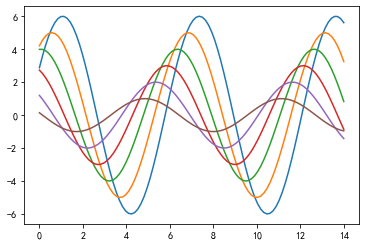

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()  #引用Seaborn之前是使用Matplotlib绘图

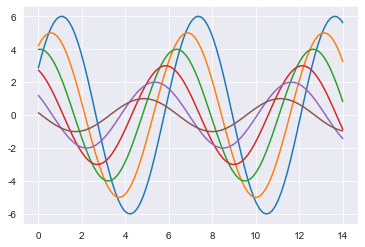

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sinplot()  #引用之后使用Seaborn绘图

### 为什么通常都把Seaborn简称成sns而不是sbn
- 听说是因为美剧The West Wing里有一个人物名叫Samuel Norman Seaborn, 首字母简写为SNS.

# Seaborn的样式

### 风格（style） 主要用于调整图表元素
- 接口
- - set，通用设置接口
- - set_style，风格专用设置接口，作用于全局
- - axes_style，风格专用设置接口，作用于当前图，同时返回设置后的风格系列参数，支持with关键字用法
- 风格样式
- - darkgrid，暗色格子背景(默认风格)
- - whitegrid 亮色格子背景
- - dark 暗色背景
- - white 亮色背景
- - ticks ?

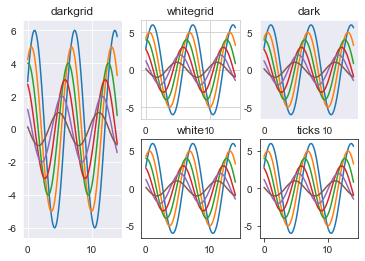

In [4]:
n=[131,232,233,235,236]
style=["darkgrid","whitegrid","dark","white","ticks"]
for i in range(5):
    sns.set_style(style[i])
    plt.subplot(n[i])
    plt.title(style[i])
    sinplot() 

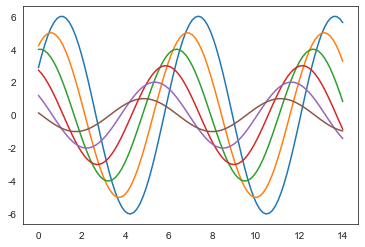

In [5]:
sns.set_style("white")
sinplot() 

### 环境（context） 主要用于设置布局元素
- 接口
- - set，通用设置接口
- - set_context，环境设置专用接口，作用于全局
- - plotting_context，环境设置专用接口，作用于当前图，同时返回设置后的环境系列参数，支持with关键字用法
- 环境样式
- - notebook，笔记本(默认环境)
- - paper    论文
- - talk   交谈
- - poster  海报
<br><br>具体长啥样👇

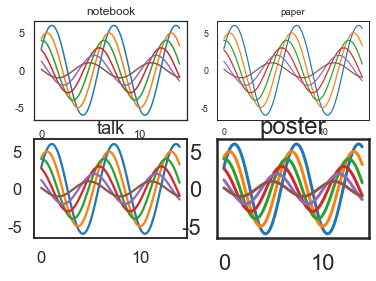

In [6]:
n=[221,222,223,224]
style=["notebook","paper","talk","poster"]
for i in range(4):
    sns.set_context(style[i])
    plt.subplot(n[i])
    plt.title(style[i])
    sinplot() 

### 如何对临时图表进行设置

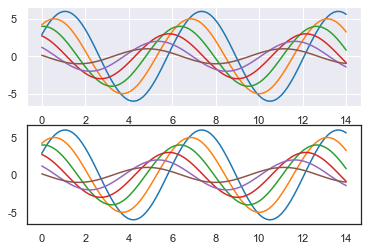

In [7]:
sns.set_context("notebook") #全局设置
sns.set_style("white")

with sns.axes_style("darkgrid"):  #局部设置
    plt.subplot(211)
    sinplot()      #局部有设置的就不受全局影响

plt.subplot(212)
sinplot()   #两者不干扰

### 可以查看风格和环境的参数
留空则是当前的设置

In [8]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

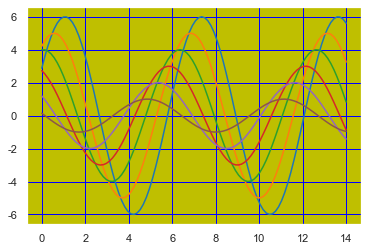

In [9]:
#当然，你可以修改属性
sns.set_style("darkgrid", {"axes.facecolor": "y","grid.color": "b"}) 
sinplot()

### 重置风格和环境

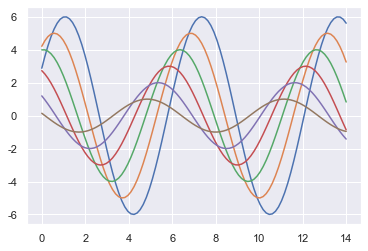

In [10]:
sns.set()   #调用通用接口并传入空值，就会还原成默认样式
sinplot()

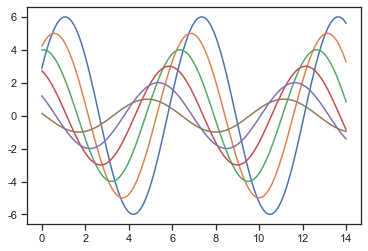

In [11]:
sns.set_style("ticks") 
sns.set_style()    #注意，对专用接口传入空值并不能还原
sinplot()

# 配色
Seaborn具有很高的自由度，配色方案也多样，常用的包括下面几种<br>
- color_palette，基于RGB设置颜色的接口，可接收一个调色板对象作为参数，同时可以设置颜色数量<br>
##### seaborn, color_palette(palette=None, n_colors = None, desat = None)
- - palette --->配色方案
- - n_colors---> 颜色个数
<br><br>
- 可选配色
- - deep  #深色配色(低饱和低亮度)
- - muted #暗淡的(较低亮度较低饱和的)配色
- - dark #昏暗的配色(比前者更暗，饱和度高)
- - pastel #粉笔色(有点莫兰蒂配色的感觉)配色
- -  bright  #明亮的配色(饱和度高)
- - colorblind #应该是给色盲专用的配色

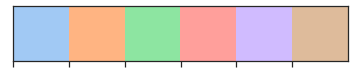

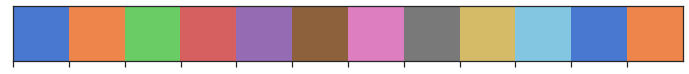

In [12]:
# 我们可以用seaborn还提供了一个专门绘制颜色结果的方法palplot来查看调色板
sns.palplot(sns.color_palette("pastel",6))
sns.palplot(sns.color_palette("muted",12))

- hls_palette，基于Hue(色相)、Luminance(亮度)、Saturation(饱和度)设置颜色的接口，除了颜色数量参数外，另外3个重要参数即是hls<br>
##### husl_palette([n_colors, h, s, l])
- - n_colors---> 颜色个数
- - h,s,l --->色相，饱和度，亮度

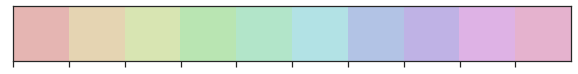

In [13]:
sns.palplot(sns.hls_palette(10 , l = .8, s = .5))

-  cubehelix_palette 立体螺旋调色板，用于生成亮度线性增大或减小的调色板
##### sns.cubehelix_palette(n_colors, start = 0, rot, dark, light, reverse = False))
- - n_colors---> 颜色个数
- - start ---> 值区间在0-3，开始颜色的色调
- - rot ---> 色盘旋转角度(用来变换色相)
- - gamma ---> 伽马值，越大颜色越暗
- - dark,light ---> 可用来控制明暗，值区间0(暗)-1(亮)
- - reverse ---> 是否反转，默认为False(浅-深)，True(深-浅)
- - as_cmap --->如果为 true，返回一个 matplotlib colormap 而不是一个颜色列表

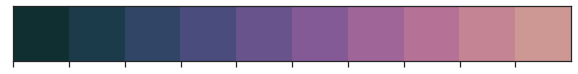

In [14]:
sns.palplot(sns.cubehelix_palette(10, start = 2, rot = 1, light = .66, reverse = True))

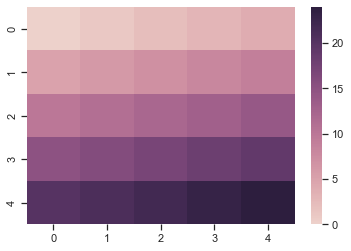

In [15]:
from numpy import arange
x = arange(25).reshape(5, 5)
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)

diverging_palette 发散调色板<br>
##### seaborn.diverging_palette(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)
- - h_neg, h_pos ---> 起始/终止颜色 0-359的双精度浮点数
- - s ---> 值区间0-100，饱和度
- - l ---> 值区间0-100，亮度
- - n ---> 颜色个数
- - center ---> 中心颜色为浅色还是深色 “light”, “dark”
- - as_cmap --->如果为 true，返回一个 matplotlib colormap 而不是一个颜色列表

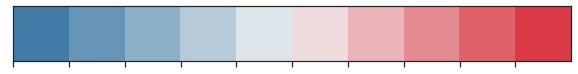

In [16]:
sns.palplot(sns.diverging_palette(240, 10, n=10))

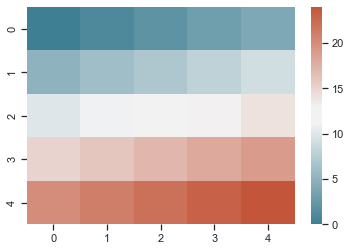

In [17]:
from numpy import arange
x = arange(25).reshape(5, 5)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)

# 绘图
Seaborn集成了大量的绘图接口，往往仅需一段代码就能实现

# 一，数据变量
## 单变量分布图
变量分布可用于表达一组数值的分布趋势，包括集中程度、离散程度等。seaborn中提供了3种表达单变量分布的绘图接口
### - [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=hist)(后续版本将要移除)/[displot](http://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)
接口内置了直方图（hist，histogram）、核密度估计图（kde，kernel density estimation）以及rug图（直译为地毯，绘图方式就是将数值出现的位置原原本本的以小柱状的方式添加在图表底部），3种图表均可通过相应参数设置开关状态，distplot默认情况下是绘制hist+kde。displot则是hist<br>

##### seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False,

##### seaborn.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - kind ---> 可视化数据的方法{“hist”, “kde”, “ecdf”}
- -  kde/hist/rug ---> 核密度估计图/直方图/地毯图是否展示(布尔)(distplot才有)

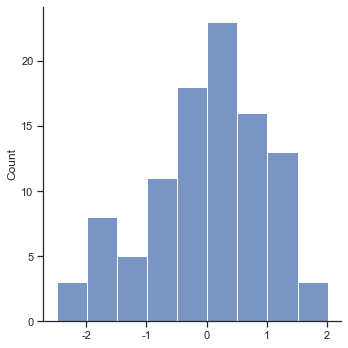

In [18]:
x = np.random.normal(size=100)
sns.displot(x)

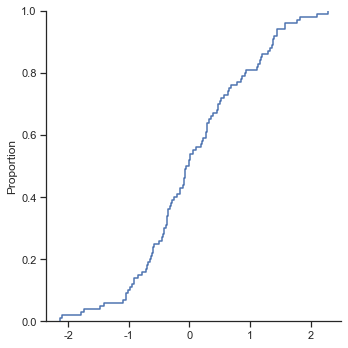

In [19]:
x = np.random.normal(size=100)
sns.displot(x,kind="ecdf")

F:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

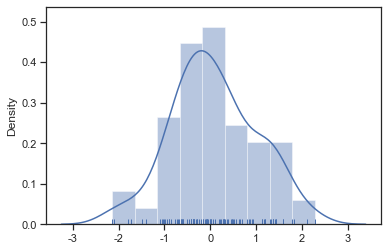

In [20]:
sns.distplot(x, kde=True, hist=True, rug=True)

### - [kdeplot](http://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)
##### seaborn.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, warn_singular=True, **kwargs)¶
<br>
kdeplot是一个专门绘制核密度估计图的接口，虽然distplot中内置了kdeplot图表，并且可通过仅开启kde开关实现kdeplot的功能，但kdeplot实际上支持更为丰富的功能<br>

- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - bw_adjust ---> 调高数值可以使线更加平滑
- - multiple ---> 映射创建子集时绘制多个元素的方法{“layer”, “stack”, “fill”}


<AxesSubplot:ylabel='Density'>

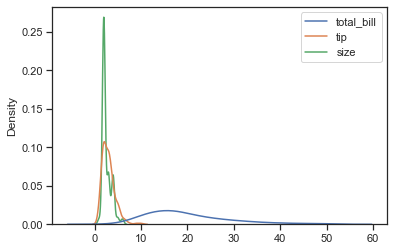

In [21]:
tips = sns.load_dataset("tips")   #小费数据集
sns.kdeplot(data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

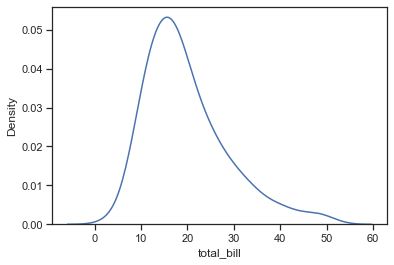

In [22]:
sns.kdeplot(data=tips, x="total_bill")  #可以分配X为指定的属性

<AxesSubplot:xlabel='Density', ylabel='total_bill'>

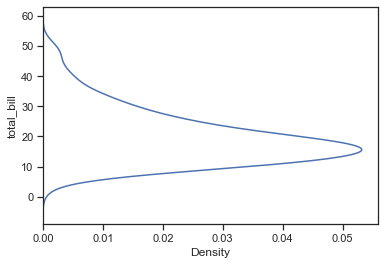

In [23]:
sns.kdeplot(data=tips, y="total_bill")  #同理Y也行

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

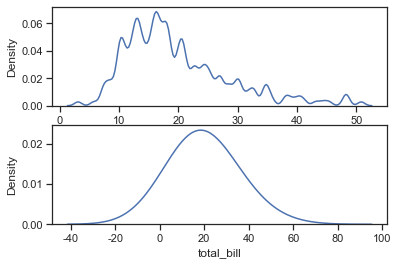

In [24]:
iris = sns.load_dataset("iris")
plt.subplot(211)
sns.kdeplot(data=tips, x="total_bill", bw_adjust=.2)  #使用更少的平滑
plt.subplot(212)
sns.kdeplot(data=tips, x="total_bill", bw_adjust=5,)  #使用更多的平滑

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

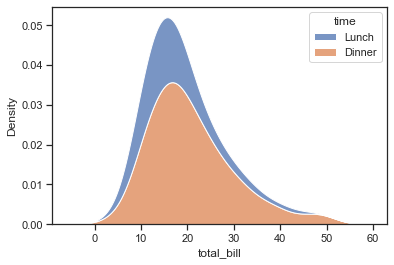

In [25]:
#多属性可以堆叠打印(面积图)
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack") 

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

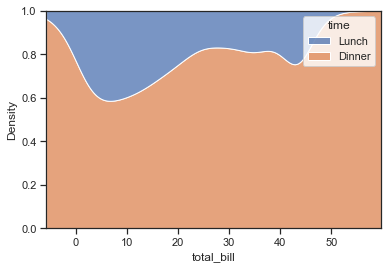

In [26]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

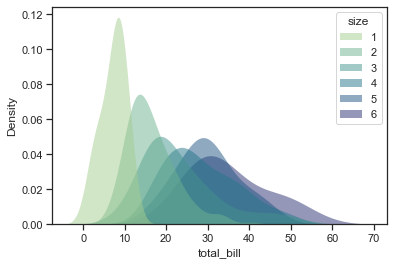

In [27]:
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot:xlabel='waiting', ylabel='duration'>

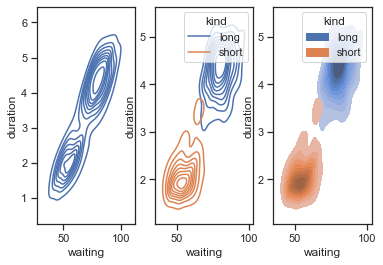

In [28]:
#绘制二元分布
geyser = sns.load_dataset("geyser")
plt.subplot(131)
sns.kdeplot(data=geyser, x="waiting", y="duration")
plt.subplot(132)
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind")
plt.subplot(133)
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind", fill=True,)

<AxesSubplot:xlabel='waiting', ylabel='duration'>

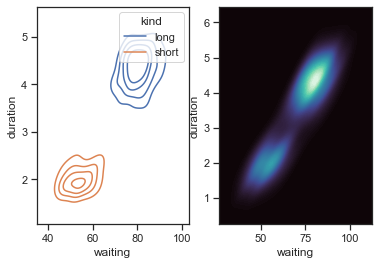

In [29]:
# 显示更少的轮廓，覆盖更少的分布
plt.subplot(121)
sns.kdeplot(
    data=geyser, x="waiting", y="duration", hue="kind",
    levels=5, thresh=.2,)
plt.subplot(122)
sns.kdeplot(  #使用不同的颜色图以平滑分布填充轴范围：
    data=geyser, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="mako",)

### - [rugplot](http://seaborn.pydata.org/generated/seaborn.rugplot.html?highlight=rugplot#seaborn.rugplot)
##### seaborn.rugplot(x=None, *, height=0.025, axis=None, ax=None, data=None, y=None, hue=None, palette=None, hue_order=None, hue_norm=None, expand_margins=True, legend=True, a=None, **kwargs)¶
<br>
映射数据在X轴于Y轴上的分布,distplot的rug就是，一般很少单独使用<br>

- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- -  hue ---> 某列数据中不同值用不同颜色展示
- - height ---> 调整高度
- - alpha ---> 调整粗细

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

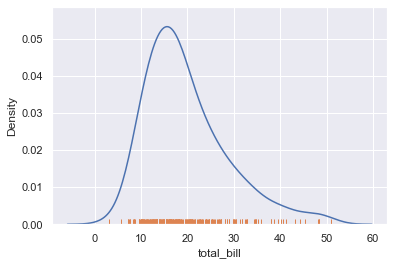

In [30]:
import seaborn as sns; sns.set_theme()
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

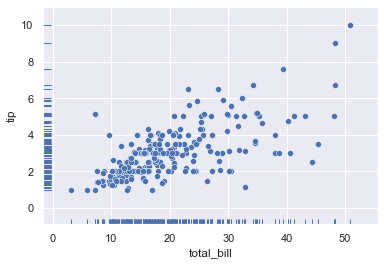

In [31]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

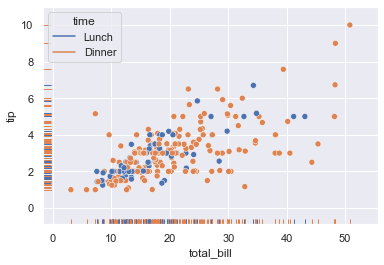

In [32]:
#用颜色区别第三个数据维度(属性)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

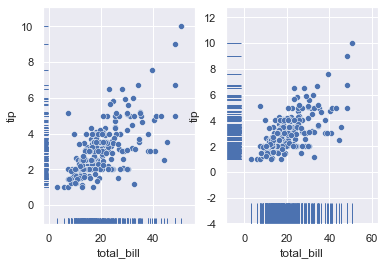

In [33]:
#可以通过 height调整rugplot高度
plt.subplot(121)
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=.03)
plt.subplot(122)
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=.1)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

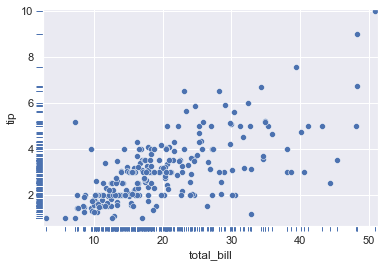

In [34]:
#你也可以将rugplot放在外面
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-.02, clip_on=False)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

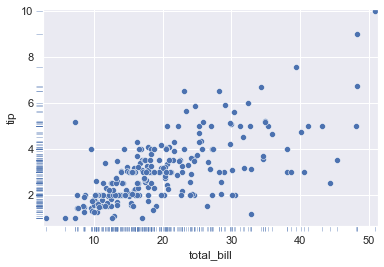

In [35]:
#调整alpha值使rugplot更细，以适应密集的数据
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-.02, clip_on=False,alpha=0.4)

## 多变量分布
单变量分布仅可用于观察单一维度的变化关系，为了探究多变量间分布关系时，如下绘图接口更为有效：

### - [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)
##### seaborn.jointplot(\*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)¶<br>
joint意为联合，顾名思义jointplot是一个双变量分布图表接口。绘图结果主要有三部分：绘图主体用于表达两个变量对应的散点图分布，在其上侧和右侧分别体现2个变量的直方图分布：<br>
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - hue ---> 某列数据中不同值用不同颜色展示
- -  kind ---> 要绘制的情节。(“scatter” | “kde” | “hist” | “hex” | “reg” | “resid” )

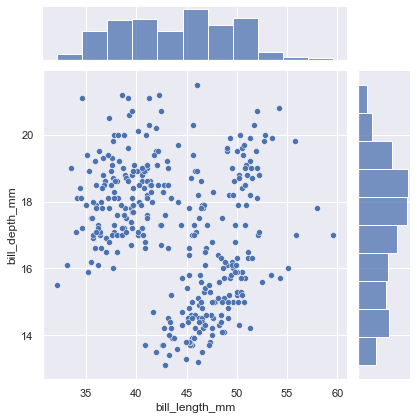

In [36]:
#创建一个中间散点图，旁边直方图
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

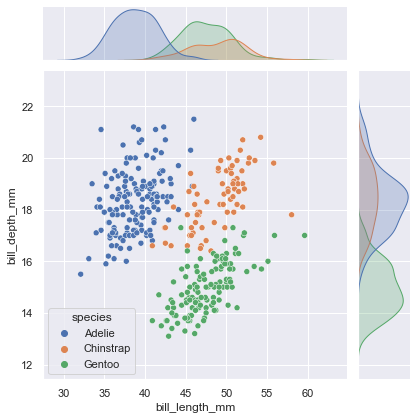

In [37]:
#用颜色区分不同的数据
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

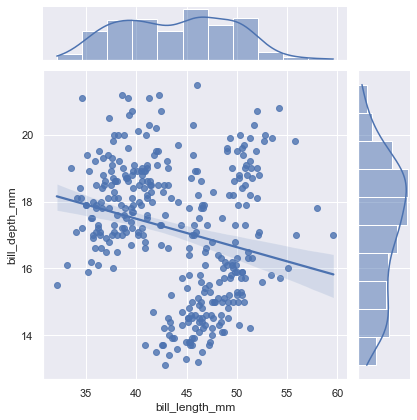

In [38]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

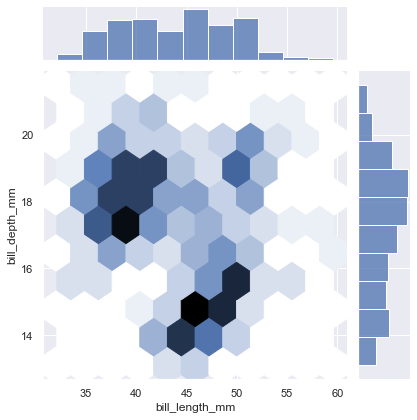

In [39]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")

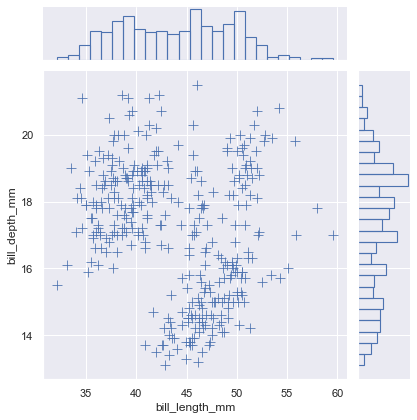

In [40]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

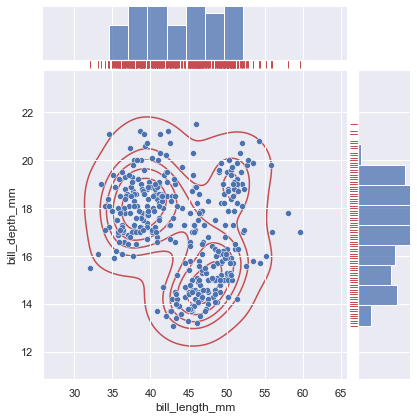

In [41]:
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

### - [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)
seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)¶<br>
默认情况下，此函数将创建一个 Axes 网格，以便在单行的 y 轴和单列的 x 轴之间共享每个数值变量。 对角线图的处理方式不同：绘制单变量分布图以显示每列中数据的边际分布。
<br>
还可以在行和列上显示变量的子集或绘制不同的变量。
<br>
这是 PairGrid 的高级界面，旨在使绘制一些常见样式变得容易。 如果您需要更大的灵活性，您应该直接使用 PairGrid。

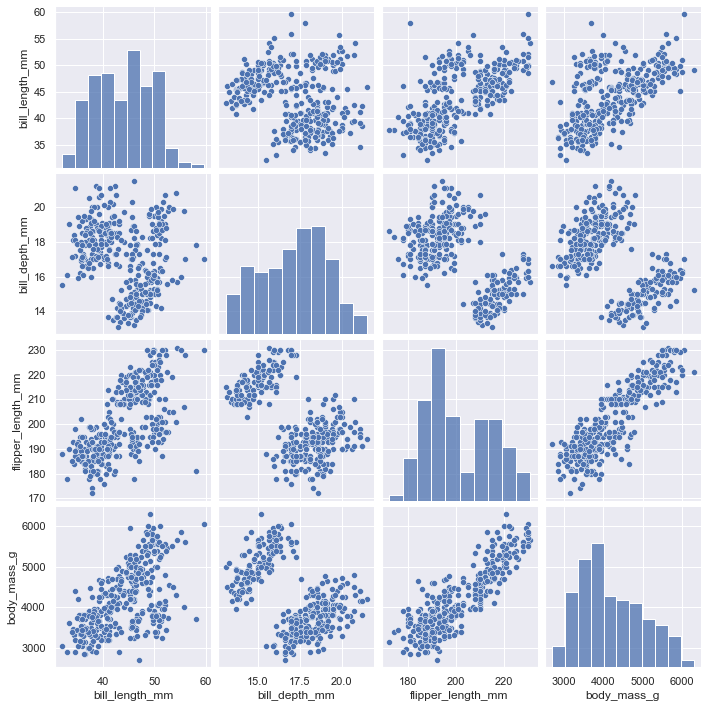

In [42]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

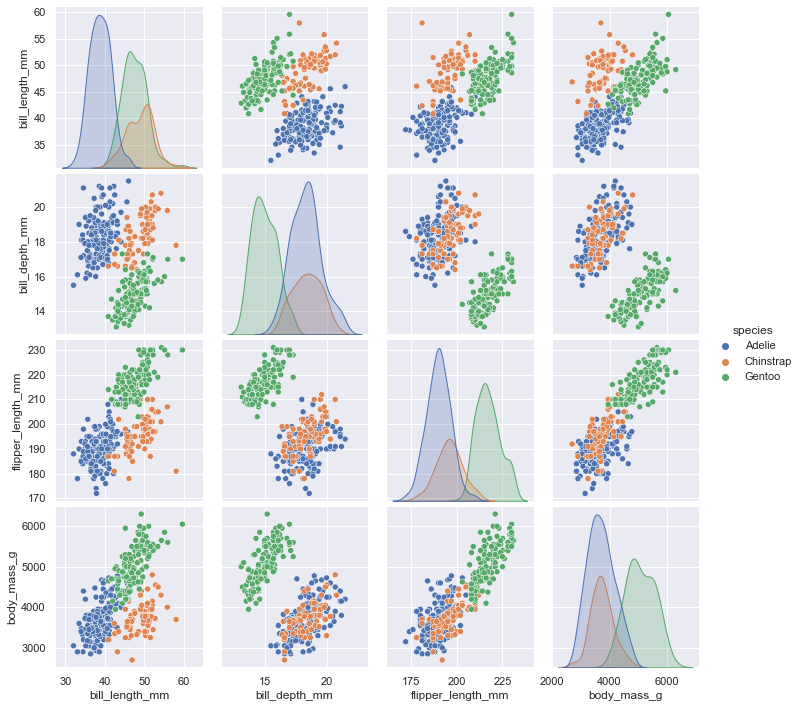

In [43]:
sns.pairplot(penguins, hue="species")

## 关系型图表
seaborn供了几个用于表达双变量关系的图表，主要包括点图和线图两类。

### - [relplot](http://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)
##### seaborn.relplot(\*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)¶<br>
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - hue ---> 某列数据中不同值用不同颜色展示
- - col/row ---> 某列不同属性不同值为切面考察数据
- -  col_wrap ---> 一行最多几个图表

In [44]:
tips = sns.load_dataset("tips")
tips.head()   #导入并查看消费数据集

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


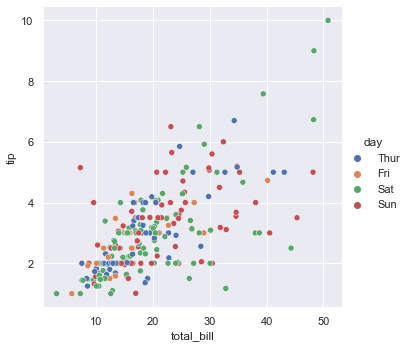

In [45]:
#不同颜色区分day维度上不同的值
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

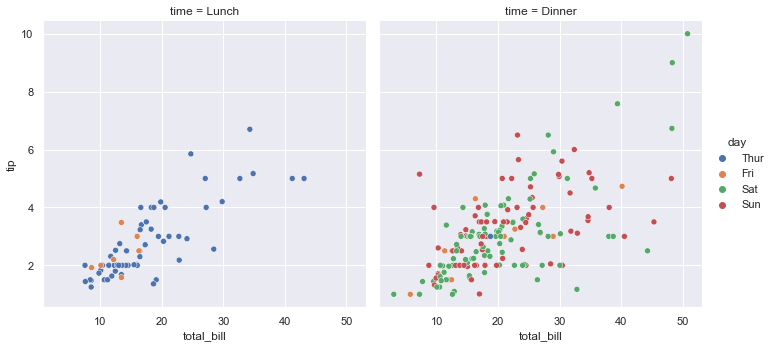

In [46]:
#指定time维度不同属性为切面考察数据
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

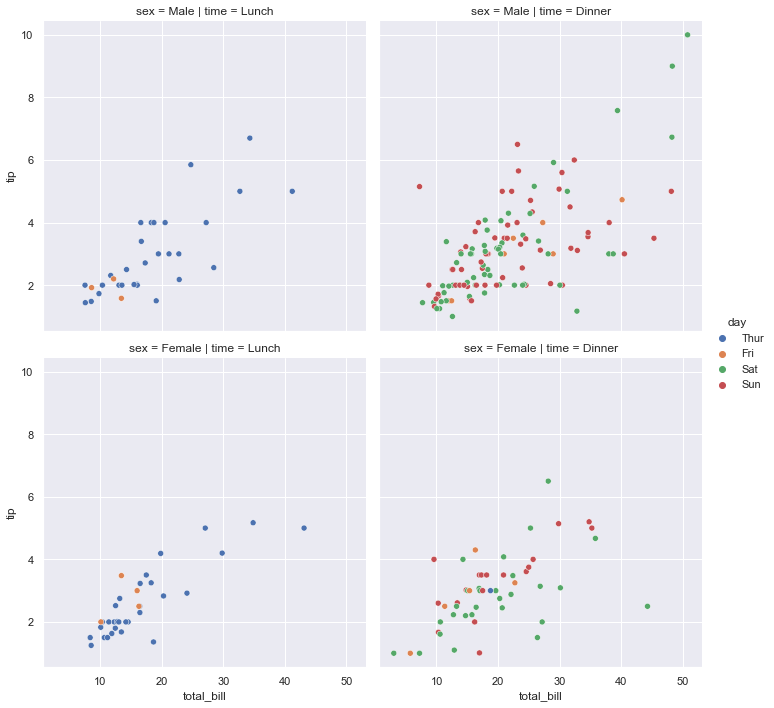

In [47]:
#row与col作用相似
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

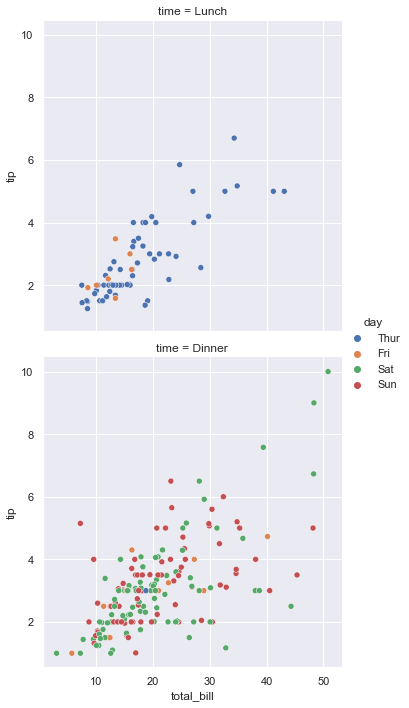

In [48]:
#指定每排展示几个图表
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", col_wrap=1)

### - [lineplot](http://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)
##### seaborn.lineplot(\*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)<br>
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - hue ---> 某列数据中不同值用不同颜色展示
- - ci ---> 置信区间(x%)
- - palette ---> 可传入调色板应用调色板的配色

In [49]:
flights = sns.load_dataset("flights")
flights.head()  #导入并展示数据

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

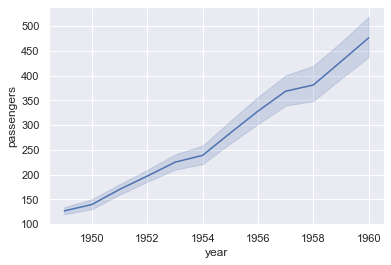

In [50]:
#是原始数据（指定年份为x，乘客数据为y）
#每个月的数据将整合到这一年上，显示平均值与正负95%区间数据
sns.lineplot(data=flights, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

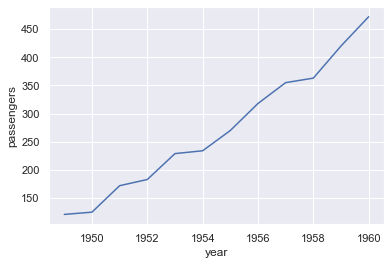

In [51]:
#显示某月数据
may_flights = flights.query("month == 'May'") #截取5月数据
sns.lineplot(data=may_flights, x="year", y="passengers")

In [52]:
#换个方法，先重构DataFrame(每年每个月的乘客数据)
flights_wide = flights.pivot("year", "month", "passengers")
#重构DataFrame (year字段为行索引，month字段为列索引,passengers字段为值)
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year', ylabel='May'>

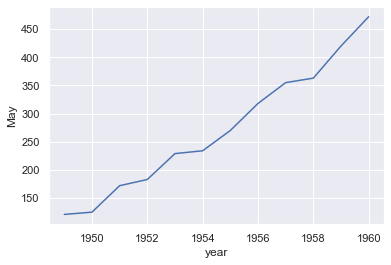

In [53]:
sns.lineplot(data=flights_wide["May"])  #传入May列数据(5月列)

<AxesSubplot:xlabel='year'>

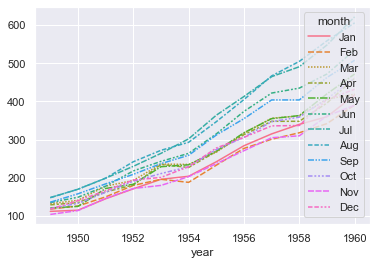

In [54]:
#如果传入多列，则会用不同样式绘制出来
sns.lineplot(data=flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

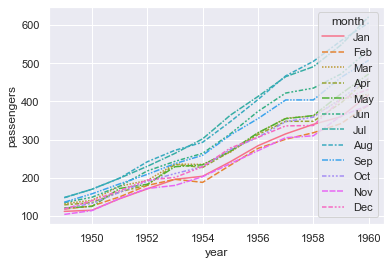

In [55]:
#还有个方法，直接使用原始数据，年份为x，乘客数据为y
#但使用不同颜色和样式区分month维度上不同值
sns.lineplot(data=flights, x="year", y="passengers", hue="month",style="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

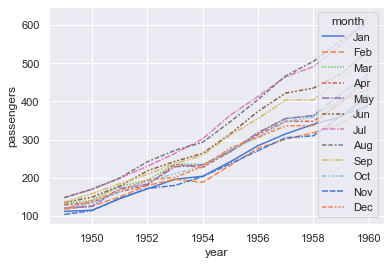

In [56]:
#还可以用上调色板
palette = sns.color_palette("muted",12)
sns.lineplot(data=flights, x="year", y="passengers", hue="month",style="month",palette=palette)

## 回归分析
在查看双变量分布关系的基础上，seaborn还提供了简单的回归接口。另外，还可设置回归模型的阶数，例如设置order=2时可以拟合出抛物线型回归线。

### - [regplot](http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)
##### seaborn.regplot(\*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)¶<br>
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- - marker ---> 散点形状
- - color ---> 图中元素的颜色
- - ci ---> 置信区间(x%)
- - order ---> 回归模型阶数

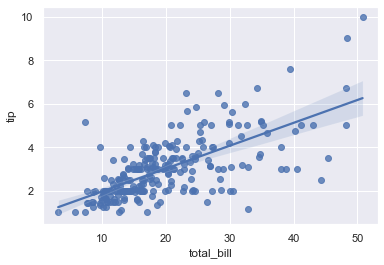

In [57]:
#在数据中绘制回归关系
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

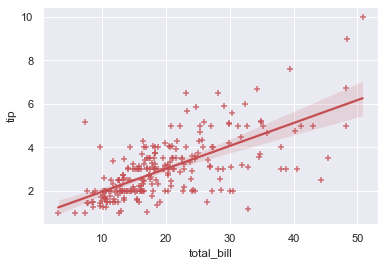

In [58]:
#更改点的样式与颜色
sns.regplot(x="total_bill", y="tip", data=tips,marker="+",color="r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

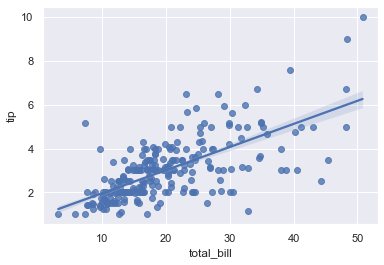

In [59]:
sns.regplot(x="total_bill", y="tip", data=tips,ci=68) #使用68%置信区间

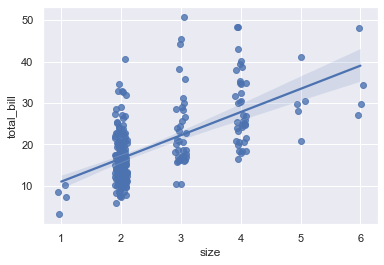

In [60]:
#一个离散的变量，并添加抖动
ax = sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

<AxesSubplot:xlabel='size', ylabel='total_bill'>

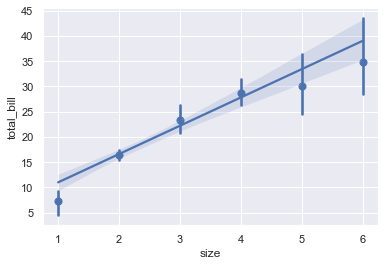

In [61]:
#使用平均值作为估计量
sns.regplot(x="size", y="total_bill", data=tips , x_estimator=np.mean)

<AxesSubplot:xlabel='x', ylabel='y'>

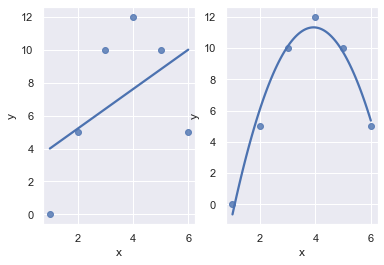

In [62]:
data=pd.DataFrame({"x":[1,2,3,4,5,6],"y":[0,5,10,12,10,5]})  #一个非线性数据
plt.subplot(121)
sns.regplot(x="x",y="y",data=data,ci=None)  #y一阶模型显然不行
plt.subplot(122)
sns.regplot(x="x",y="y",data=data,order=2,ci=None)  #二阶模型明显拟合程度更好

### - [lmplot](http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)
lmplot=regplot+FacetGrid ，功能更加强大<br>
##### seaborn.lmplot(\*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)¶<br>
- 常用参数
- - data ---> 数据
- -  x ---> 指定某列数据为x轴
- - y ---> 指定某列数据为y轴
- -  hue ---> 某列数据中不同值用不同颜色展示
- - col ---> 某列不同属性不同值为切面考察数据
- -  palette ---> 用于变量不同级别的颜色。可以通过color_palette或字典映射色调整
- - markers ---> 散点的形状。如果传入列表，则列表中的每个类别将对于一个形状

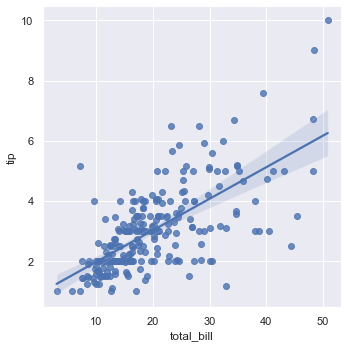

In [63]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips)

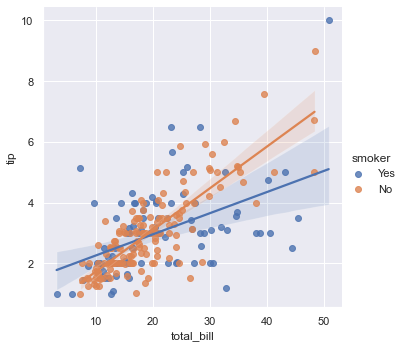

In [64]:
#可以对smoker列中不同值用不同颜色展示
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

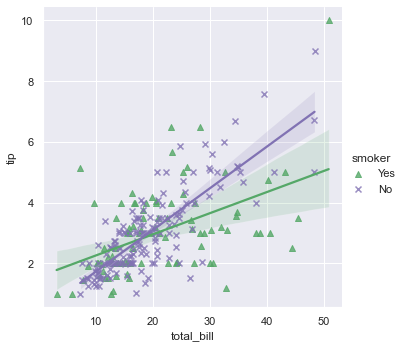

In [65]:
#每类的颜色和样式进行可自定义
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
               palette={"Yes":"g","No":"m"},markers=["^", "x"])

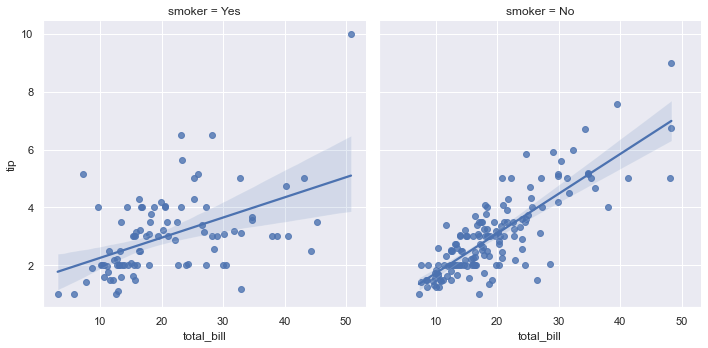

In [66]:
#指定smoker列不同属性为切面考察数据
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

## 矩阵图(热力图)
矩阵图主要用于表达一组数值型数据的大小关系

### - [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
##### seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)¶<br>
- 常用参数
- - data ---> 数据
- - center ---> 中心
- - annot ---> 是否显示每个单元格的值(布尔)
- - linewidths ---> 每个单元格边框线粗
- - vmin/vmax ---> 色卡上的最小/大值
- -  xticklabels/ yticklabel ---> x/y轴标签(=布尔值可控制是否展示,=数字则控制标签值间隔)
- - cbar ---> 是否显示色卡(布尔)

<AxesSubplot:>

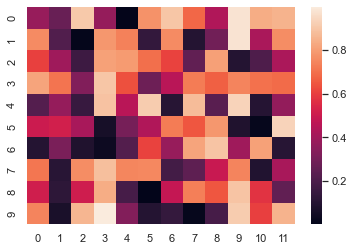

In [67]:
sns.set_theme()
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

<AxesSubplot:>

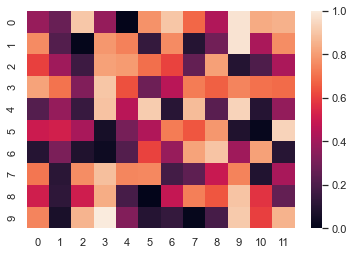

In [68]:
#设置颜色的的限度
sns.heatmap(uniform_data, vmin=0, vmax=1)

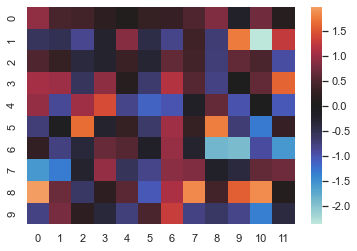

In [69]:
#绘制0为中心的热力图
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

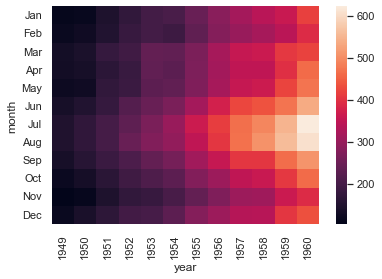

In [70]:
#会按照数据的行列索引自动添加标签
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

可以看出，随着年份的增长，坐飞机的人越来越多，而且七八月份业务相对繁忙

<AxesSubplot:xlabel='year', ylabel='month'>

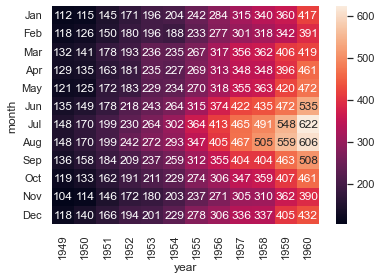

In [71]:
#我们可以对每个单元格标上具体数值，fmt="d"--->忽略小数
sns.heatmap(flights, annot=True, fmt="d")

<AxesSubplot:xlabel='year', ylabel='month'>

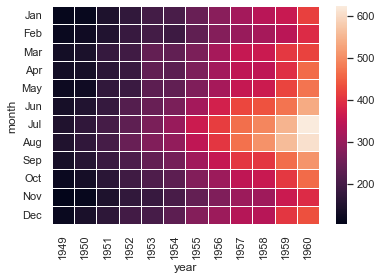

In [72]:
#可以加上指定宽度的边框
sns.heatmap(flights, linewidths=.5)

<AxesSubplot:xlabel='year', ylabel='month'>

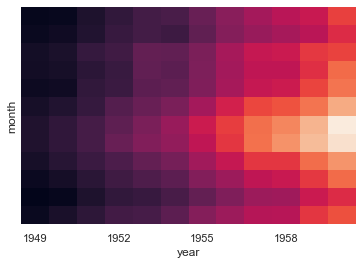

In [73]:
#可以隐藏某个标签，也可以控制标签值的间隔,色卡也可以隐藏
sns.heatmap(flights, xticklabels=3, yticklabels=False , cbar=False)

# 二，分类数据
## 散点图
与上面出现的散点图有所不同，分类数据的散点图主要用于当一列/行数据是分类变量时
### - [stripplot](http://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)
该接口通过jitter参数控制点是否左右随机扩散
##### seaborn.stripplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)¶<br>

### - [swarmplot](http://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)
该接口散点一字扩散
##### seaborn.swarmplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)¶
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -   jitter ---> 左右扩散程度
- - linewidth --> 描边宽度
- -  hue ---> 某列数据中不同值用不同颜色展示

<AxesSubplot:xlabel='day', ylabel='total_bill'>

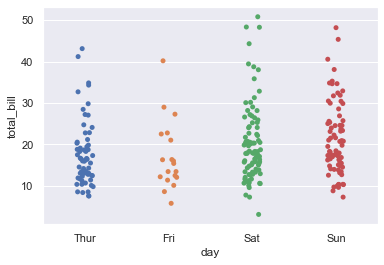

In [74]:
#分类数据会自动使用颜色进行区分
#随机排开的stripplot
tips = sns.load_dataset("tips")
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

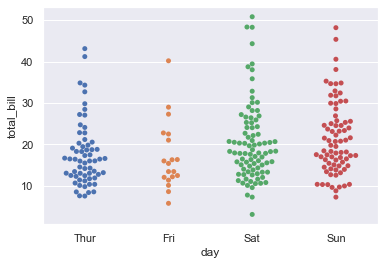

In [75]:
# 一字排开的swarmplot
sns.swarmplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

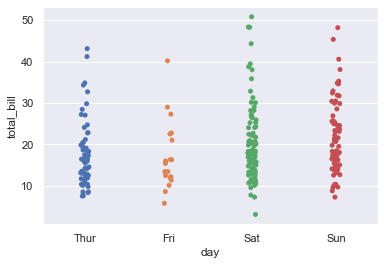

In [76]:
#控制左右扩散程度
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

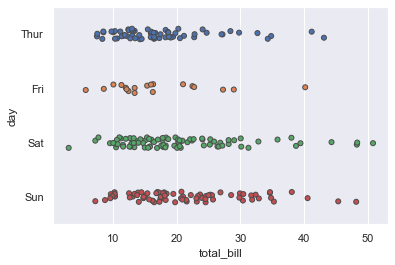

In [77]:
#调换X/Y可使得散点横过来(Y轴为分类数据),并设置宽度为1的描边
sns.stripplot(x="total_bill", y="day", data=tips,linewidth=1)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

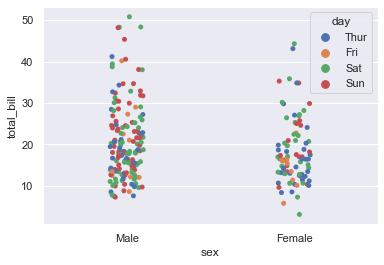

In [78]:
# day列数据中不同值用不同颜色展示
sns.stripplot(x="sex", y="total_bill", hue="day", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

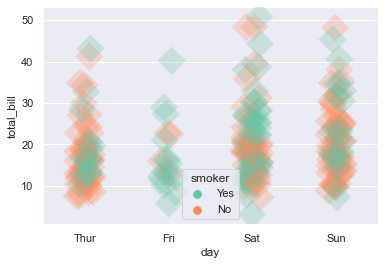

In [79]:
sns.stripplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", size=20, marker="D",alpha=.25)

## 箱型图
通常用于观察数据分布，判断是否存在异常值等等<br><br>
先找出一组数据的上边缘、下边缘、中位数和两个四分位数；然后， 连接两个四分位数画出箱体；再将上边缘和下边缘与箱体相连接，中位数在箱体中间。——(百度百科)
### - [boxplot](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)
##### seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -  hue ---> 某列数据中不同值用不同颜色展示
- -  linewidth ---> 线条粗细

<AxesSubplot:xlabel='day', ylabel='total_bill'>

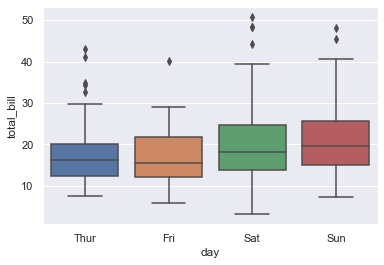

In [80]:
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

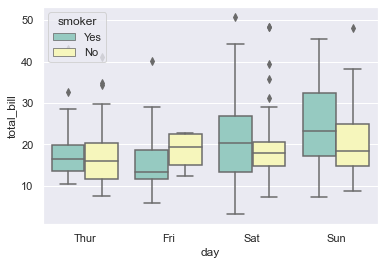

In [81]:
#使用不同颜色区分数据，配色方案Set3
sns.boxplot(x="day", y="total_bill", hue="smoker",
            data=tips, palette="Set3")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

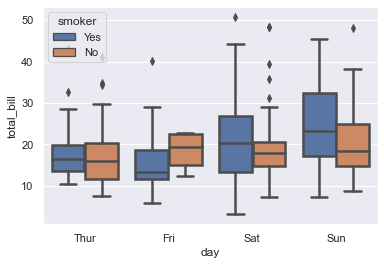

In [82]:
# 调整线条粗细(箱子轮廓也会更改)
sns.boxplot(x="day", y="total_bill", hue="smoker",
            data=tips, linewidth=2.5)

<AxesSubplot:>

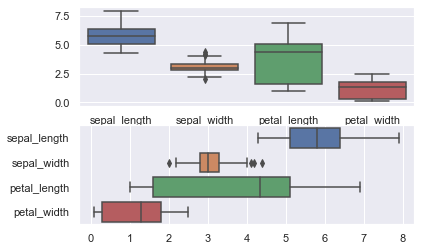

In [83]:
#不指定XY则箱型图反应每个数值列的数据
iris = sns.load_dataset("iris")
plt.subplot(211)
sns.boxplot(data=iris)
plt.subplot(212)
sns.boxplot(data=iris, orient="h")  #可以交换XY

<AxesSubplot:xlabel='total_bill', ylabel='day'>

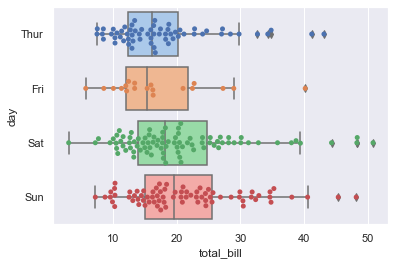

In [84]:
#配合散点图
sns.boxplot(x="total_bill", y="day", data=tips,palette="pastel")
sns.swarmplot(x="total_bill", y="day", data=tips,color="0.4",palette="deep")

### - [boxenplot](http://seaborn.pydata.org/generated/seaborn.boxenplot.html?highlight=boxenplot#seaborn.boxenplot)
plus版箱型图，在标准箱线图的基础上增加了更多的分位数信息，绘图效果更为美观，信息量更大。
##### seaborn.boxenplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='tukey', linewidth=None, scale='exponential', outlier_prop=0.007, trust_alpha=0.05, showfliers=True, ax=None, **kwargs)¶
使用方法法与前者基本相同

<AxesSubplot:xlabel='total_bill'>

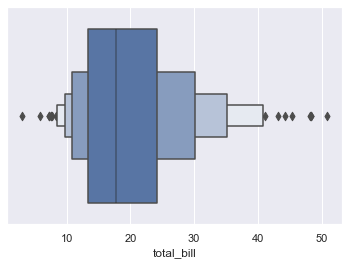

In [85]:
tips = sns.load_dataset("tips")
sns.boxenplot(x=tips["total_bill"])

### - [violinplot (小提琴图)](http://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)
跟箱形图类似，但是在密度层面展示更好。在数据量非常大不方便一个一个展示的时候小提琴图特别适用。
##### seaborn.violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)¶
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -  hue ---> 某列数据中不同值用不同颜色展示
- - split ---> 将两个类别的小提琴图的一半拼接(布尔)
- - bw ---> 平滑度

<AxesSubplot:xlabel='day', ylabel='total_bill'>

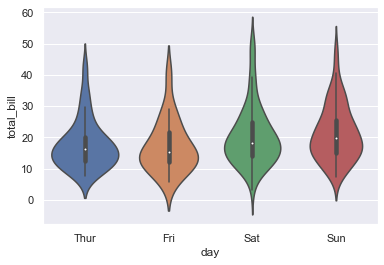

In [86]:
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

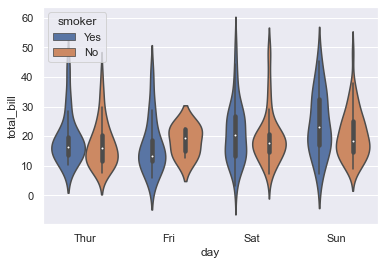

In [87]:
sns.violinplot(x="day", y="total_bill",data=tips, hue="smoker")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

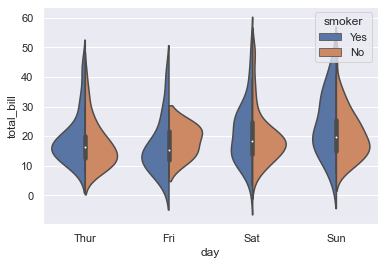

In [88]:
#将两个分类是形状合一(绘制分裂的小提琴图)
sns.violinplot(x="day", y="total_bill",data=tips, hue="smoker",
                     split=True)

<AxesSubplot:xlabel='time', ylabel='tip'>

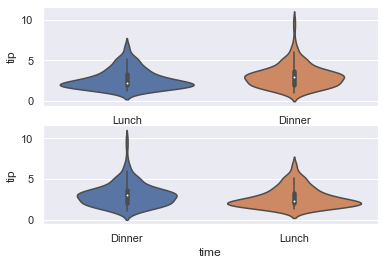

In [89]:
#控制小提琴的顺序
plt.subplot(211)
sns.violinplot(x="time", y="tip", data=tips)
plt.subplot(212)
sns.violinplot(x="time", y="tip", data=tips , order=["Dinner", "Lunch"])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

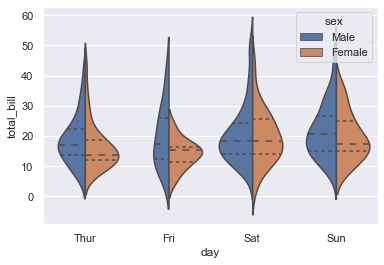

In [90]:
#绘制四分位展示线
sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, split=True,inner="quartile")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

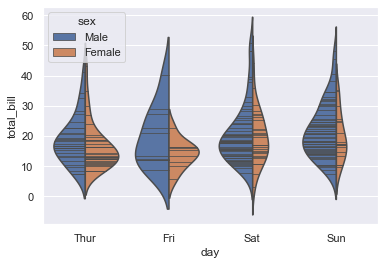

In [91]:
#绘制每个数据值展示线
sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, split=True,scale="count",inner="stick")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

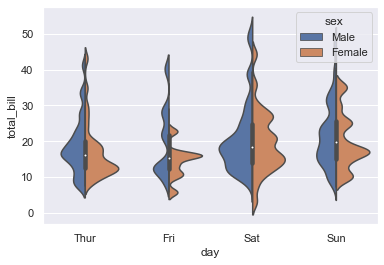

In [92]:
#减少小提琴的平滑度
sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, split=True,bw=0.2)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

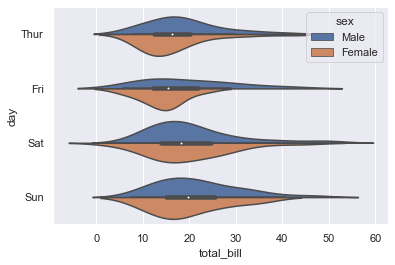

In [93]:
#调换XY使小提琴水平
sns.violinplot(x="total_bill", y="day", hue="sex",
                    data=tips, split=True)

## 统计图
通常用来统计数据量以及对比数据与观察数据变化

### - [pointplot（带折线的点图）](http://seaborn.pydata.org/generated/seaborn.pointplot.html)
##### seaborn.pointplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)¶
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -  hue ---> 某列数据中不同值用不同颜色展示
- - linestyles ---> 折线样式 
- - markers ---> 点样式
- - join ---> 是否连接点(折线)(布尔/影响后续操作)
- - ci ---> float 在估计值附近绘制置信区间的尺寸大小。
- - - “sd”，则跳过引导阶段并绘制观察数据点的标准差。
- - - None，则不会执行引导过程，并且不会绘制误差块

<AxesSubplot:xlabel='time', ylabel='total_bill'>

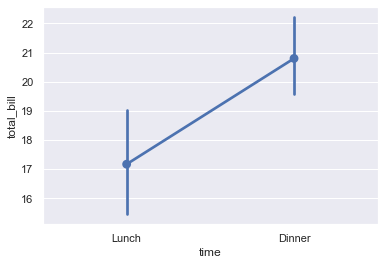

In [94]:
tips = sns.load_dataset("tips")
sns.pointplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

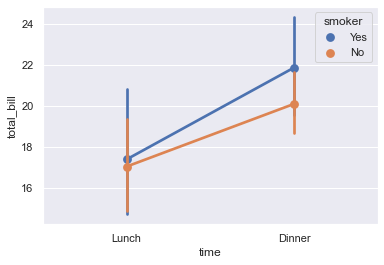

In [95]:
#用不同颜色展示是否吸烟的乘客的数量
sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips)

F:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8666666666666667, 0.5176470588235295, 0.3215686274509804)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


<AxesSubplot:xlabel='time', ylabel='total_bill'>

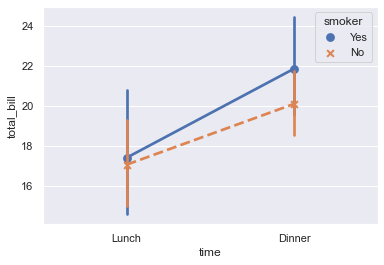

In [96]:
sns.pointplot(x="time", y="total_bill", hue="smoker",
                   data=tips,
                   markers=["o", "x"],
                   linestyles=["-", "--"])

<AxesSubplot:xlabel='time', ylabel='total_bill'>

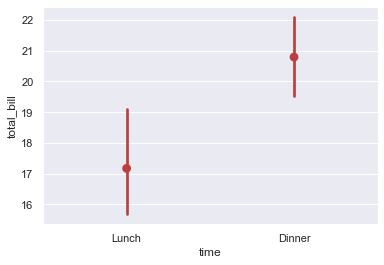

In [97]:
#不连接点
sns.pointplot(x="time", y="total_bill", data=tips,join=False ,color="#bb3f3f")

<AxesSubplot:xlabel='time', ylabel='total_bill'>

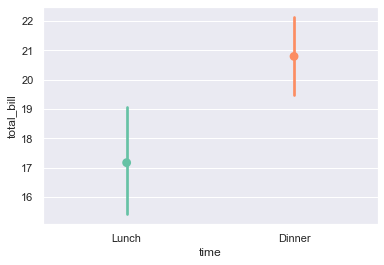

In [98]:
#使用调色板(join设置依旧生效？)
sns.pointplot(x="time", y="total_bill", data=tips,palette="Set2")

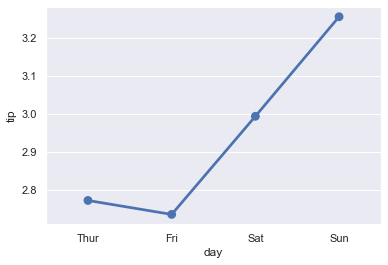

In [99]:
#不绘制误差条
ax = sns.pointplot(x="day", y="tip", data=tips, ci=None)

### - [barplot(将点估计值和置信度间隔显示为矩形条)(柱状图)](http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)
##### seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)¶
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -  hue ---> 某列数据中不同值用不同颜色展示
- - order ---> 指定顺序
- - ci ---> float 在估计值附近绘制置信区间的尺寸大小。
- - - “sd”，则跳过引导阶段并绘制观察数据点的标准差。
- - - None，则不会执行引导过程，并且不会绘制误差块

<AxesSubplot:xlabel='day', ylabel='total_bill'>

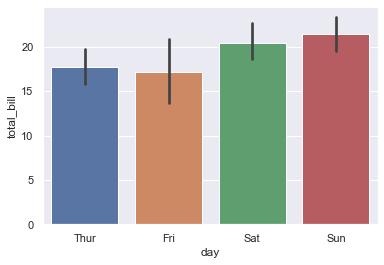

In [100]:
tips = sns.load_dataset("tips")
sns.barplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

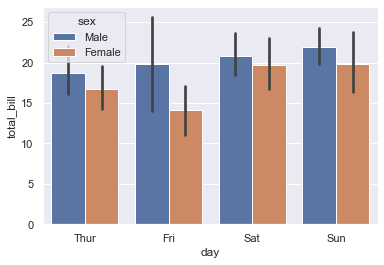

In [101]:
#区分不同性别
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

<AxesSubplot:xlabel='tip', ylabel='day'>

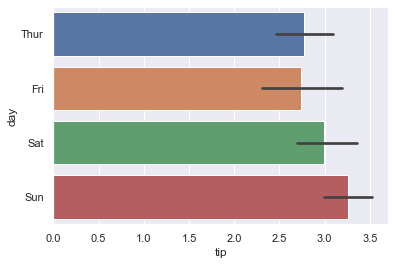

In [102]:
#倒置XY使柱状图横过来
sns.barplot(x="tip", y="day", data=tips)

<AxesSubplot:xlabel='time', ylabel='tip'>

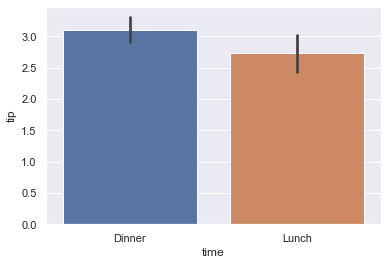

In [103]:
sns.barplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

<AxesSubplot:xlabel='day', ylabel='tip'>

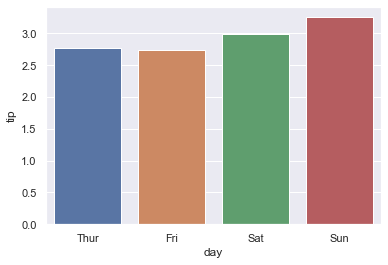

In [104]:
#不显示误差条
sns.barplot(x="day", y="tip", data=tips, ci=None)

<AxesSubplot:xlabel='size', ylabel='total_bill'>

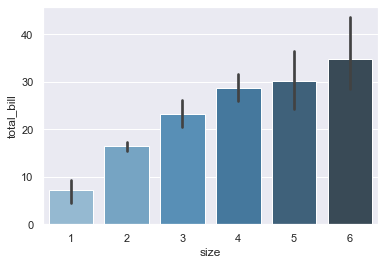

In [105]:
#使用调色板
sns.barplot(x="size", y="total_bill", data=tips,
                 palette="Blues_d")

### - [countplot(常用简单的柱状图)](http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot)
##### seaborn.countplot(\*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
- 常用参数
- - data ---> 数据
- -  x ---> 散点图的x轴数据，通常为分类型数据
- - y ---> 散点图的y轴数据，通常为数值型数据
- -  hue ---> 某列数据中不同值用不同颜色展示
- - order ---> 指定顺序

<AxesSubplot:xlabel='day', ylabel='count'>

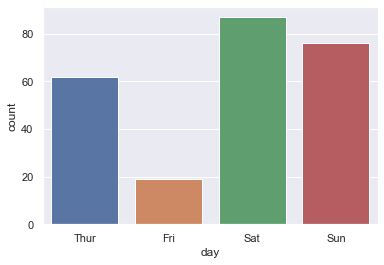

In [106]:
tips = sns.load_dataset("tips")
#注意只能传入XY中一个参数
sns.countplot(x="day", data=tips)

<AxesSubplot:xlabel='day', ylabel='count'>

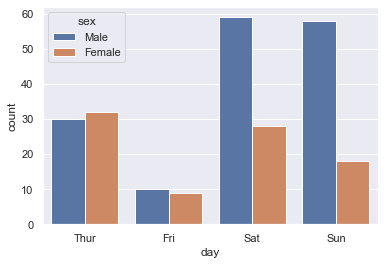

In [107]:
#区分不同类别
sns.countplot(x="day", data=tips,hue="sex")

<AxesSubplot:xlabel='count', ylabel='day'>

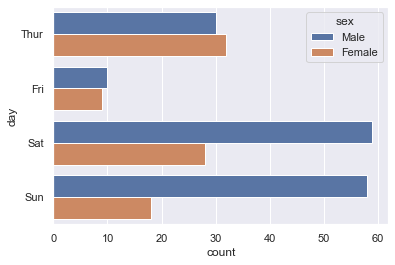

In [108]:
#换成y使柱状图横过来
sns.countplot(y="day", data=tips,hue="sex")

<AxesSubplot:xlabel='day', ylabel='count'>

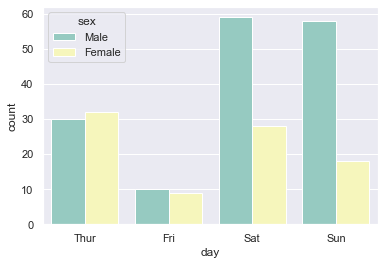

In [109]:
#使用调色板
sns.countplot(x="day", data=tips,hue="sex",palette="Set3")

<AxesSubplot:xlabel='day', ylabel='count'>

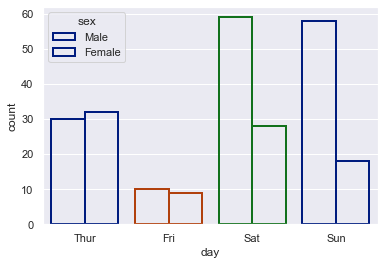

In [110]:
#镂空造型，线宽为2
sns.countplot(x="day", data=tips,hue="sex",
              facecolor=(0, 0, 0, 0),linewidth=2,edgecolor=sns.color_palette("dark", 3))